# 统计与大数据分析软件第七次作业

## 第一题

给定
```python
dataframe df=pd.DataFrame({
    "vals": np.random.RandomState(31).randint(-30, 30, size=15), 
    "grps": np.random.RandomState(31).choice(["A", "B"], 15)
})
```
给df新增一列`patched_vals`, 如果`vals`相应行非负，则`patched_vals`等于`vals`，否则等于组平均值(按照`grps`分组)。

对于这个步骤，首先导入相应的包：

In [1]:
import pandas as pd
import numpy as np

接下来命名一个函数：

In [2]:
df=pd.DataFrame({
    "vals": np.random.RandomState(31).randint(-30, 30, size=15), 
    "grps": np.random.RandomState(31).choice(["A", "B"], 15)
})

In [3]:
df

,vals,grps
0,-12,A
1,-7,B
2,-14,A
3,4,A
4,-7,A
5,28,B
6,-2,A
7,-1,A
8,8,A
9,-2,B


先计算平均数：

In [4]:
group_means = df.groupby("grps")['vals'].transform('mean')
group_means

0    -0.333333
1     6.333333
2    -0.333333
3    -0.333333
4    -0.333333
5     6.333333
6    -0.333333
7    -0.333333
8    -0.333333
9     6.333333
10   -0.333333
11   -0.333333
12   -0.333333
13   -0.333333
14   -0.333333
Name: vals, dtype: float64

我们接下来新增一列：

In [5]:
df['patched_vals'] = np.where(df['vals'] >= 0, df['vals'], group_means)
df

,vals,grps,patched_vals
0,-12,A,-0.333333
1,-7,B,6.333333
2,-14,A,-0.333333
3,4,A,4.000000
4,-7,A,-0.333333
5,28,B,28.000000
6,-2,A,-0.333333
7,-1,A,-0.333333
8,8,A,8.000000
9,-2,B,6.333333


## 第二题

使用iris数据集分别创建如下图形（详见题目）：

1. 绘制计数的柱状图，绘图要导入包

In [6]:
import matplotlib.pyplot as plt

接下来，读取数据

In [7]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


对数据进行计数：

In [8]:
variety_counts = iris['variety'].value_counts()
variety_counts

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

接下来设计绘图：

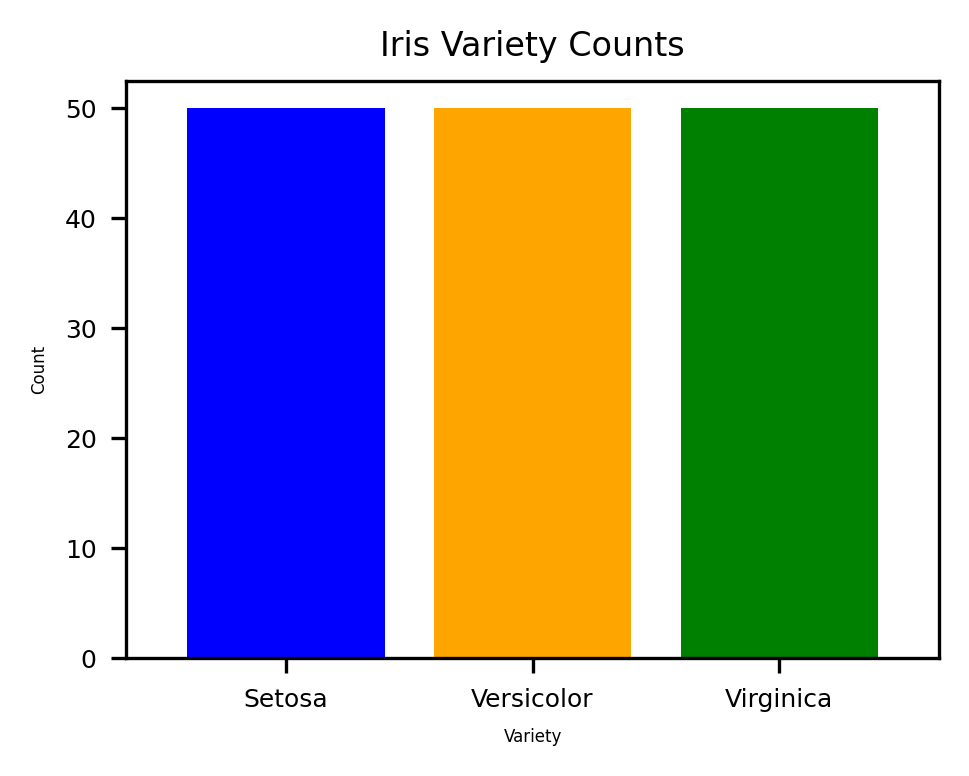

In [9]:
# 定义不同的颜色
colors = ['blue', 'orange', 'green']

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置图形大小
plt.figure(figsize=(3.5, 2.5))

# 绘制带颜色的条形图
variety_counts.plot(kind='bar', color=colors, width=0.8)


# 添加标题并设置字体大小
plt.title('Iris Variety Counts', fontsize=8)
# 添加 x 轴标签并设置字体大小
plt.xlabel('Variety', fontsize=4)
# 添加 y 轴标签并设置字体大小
plt.ylabel('Count', fontsize=4)
# 设置 x 轴刻度标签字体大小
plt.xticks(rotation=0, fontsize=6)
# 设置 y 轴刻度标签字体大小
plt.yticks(fontsize=6)

# 显示图形
plt.show()

2. 绘制平均值（带有以标准差作为误差棒）的曲线图

In [10]:
import seaborn as sns

我们先计算均值和标准差

In [11]:
# 计算均值
means = iris[['sepal.length','sepal.width', 'petal.length', 'petal.width']].mean()
means

sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64

In [12]:
# 计算标准差
stds = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].std()
stds

sepal.length    0.828066
sepal.width     0.435866
petal.length    1.765298
petal.width     0.762238
dtype: float64

继续绘图：

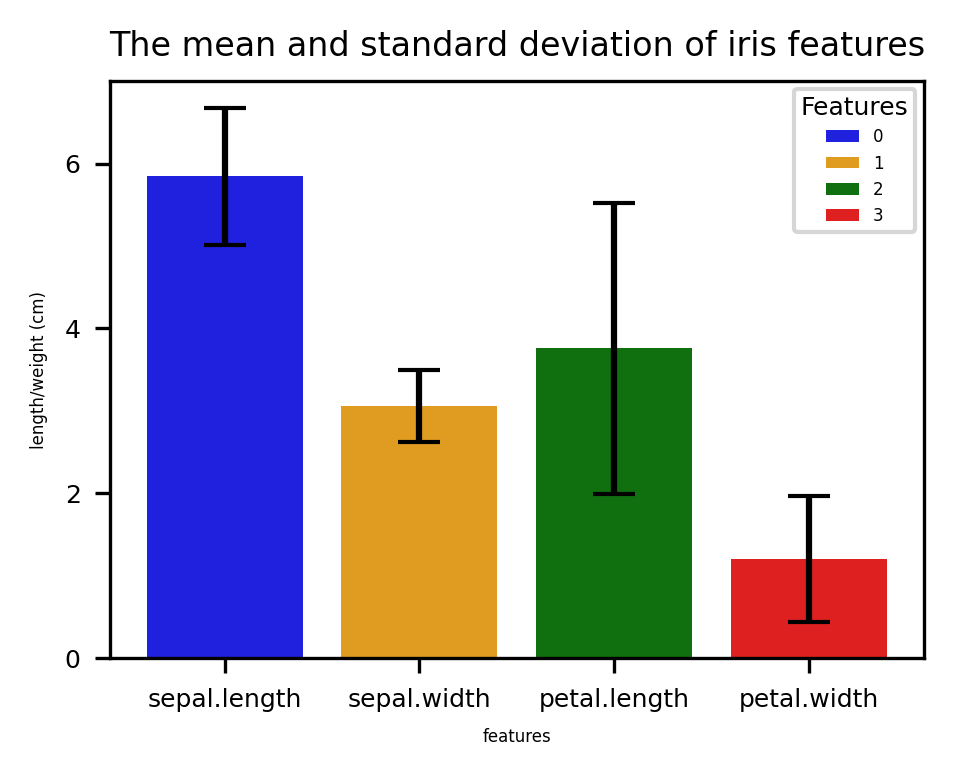

In [13]:
# 设置不同的颜色
colors = ['blue', 'orange', 'green', 'red']
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300
# 设置图形大小
plt.figure(figsize=(3.5, 2.5))
# 柱状图位置
x = range(len(means.index))

# 绘制柱状图
# plt.bar(x, means, yerr=stds, align='center', alpha=0.7, color=colors, ecolor='black', capsize=5)
# 绘制柱状图，使用 seaborn 的 barplot 函数
ax = sns.barplot(x=means.index, y=means.values, hue=x, palette=colors)

# 添加误差棒
for i, (mean, std) in enumerate(zip(means, stds)):
    plt.errorbar(i, mean, yerr=std, fmt='none', ecolor='black', capsize=5)

# 添加标题并设置字体大小
plt.title('The mean and standard deviation of iris features', fontsize=8)
# 添加 x 轴标签并设置字体大小
plt.xlabel('features', fontsize=4)
# 添加 y 轴标签并设置字体大小
plt.ylabel('length/weight (cm)', fontsize=4)
# 设置 x 轴刻度标签字体大小
plt.xticks(rotation=0, fontsize=6)
# 设置 y 轴刻度标签字体大小
plt.yticks(fontsize=6)

# 设置图例
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, title="Features", fontsize=4, title_fontsize=6)

# 显示图形
plt.show()

3. 绘制直方图并添加分布曲线：

导入`seaborn`库，`Seaborn`是基于`Python`且非常受欢迎的图形可视化库，在`Matplotlib`的基础上，进行了更高级的封装，使得作图更加方便快捷。

In [14]:
import seaborn as sns

由于是绘制`sepal.length`的直方图并添加核密度估计曲线，我们可以直进行绘图

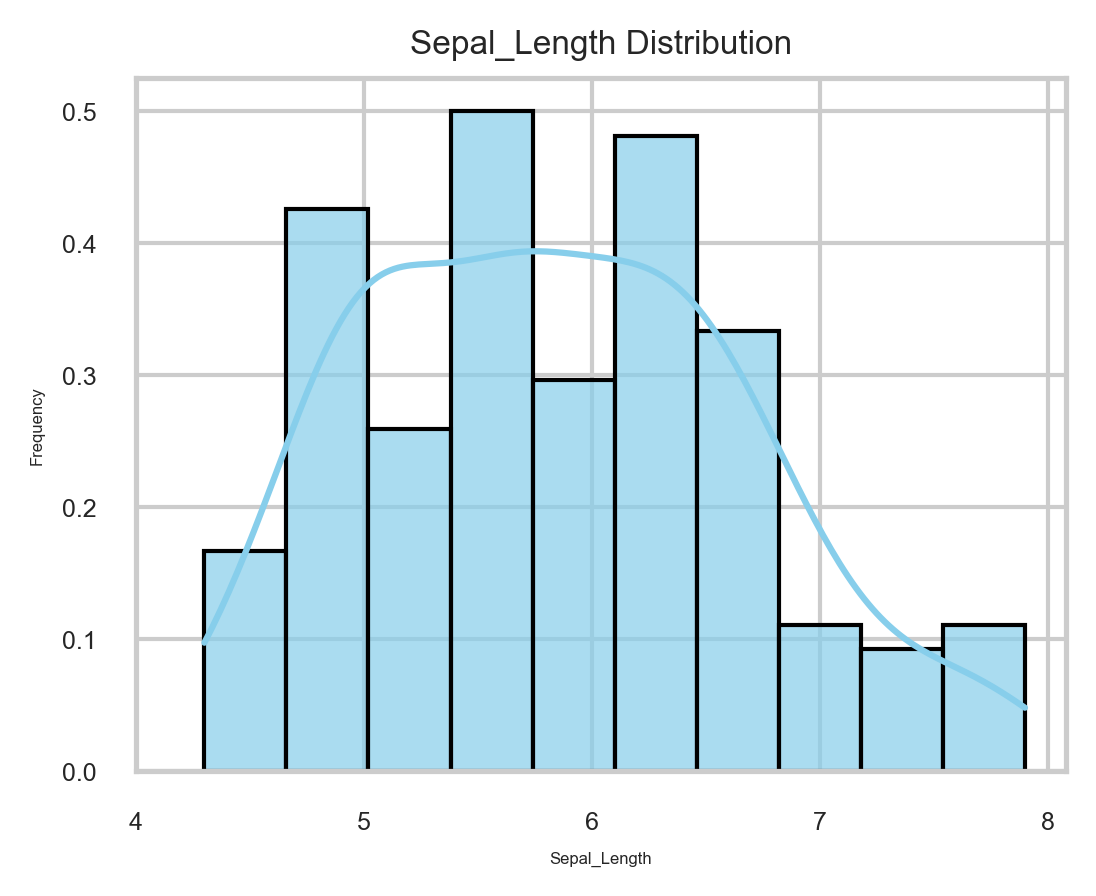

In [34]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300
# 设置图形大小
plt.figure(figsize=(4, 3))

# 绘制 sepal.length 的直方图并添加核密度估计曲线
sns.histplot(iris['sepal.length'], kde=True, stat='density', bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# 添加标题并设置字体大小
plt.title('Sepal_Length Distribution', fontsize=8)
# 添加 x 轴标签并设置字体大小
plt.xlabel('Sepal_Length', fontsize=4)
# 添加 y 轴标签并设置字体大小
plt.ylabel('Frequency', fontsize=4)
# 设置 x 轴刻度标签字体大小
plt.xticks([4,5,6,7,8], fontsize=6)
# 设置 y 轴刻度标签字体大小
plt.yticks(fontsize=6)

# 显示图形
plt.show()

4. 回归关系图

我们仍然是直接绘图即可

<Figure size 600x450 with 0 Axes>

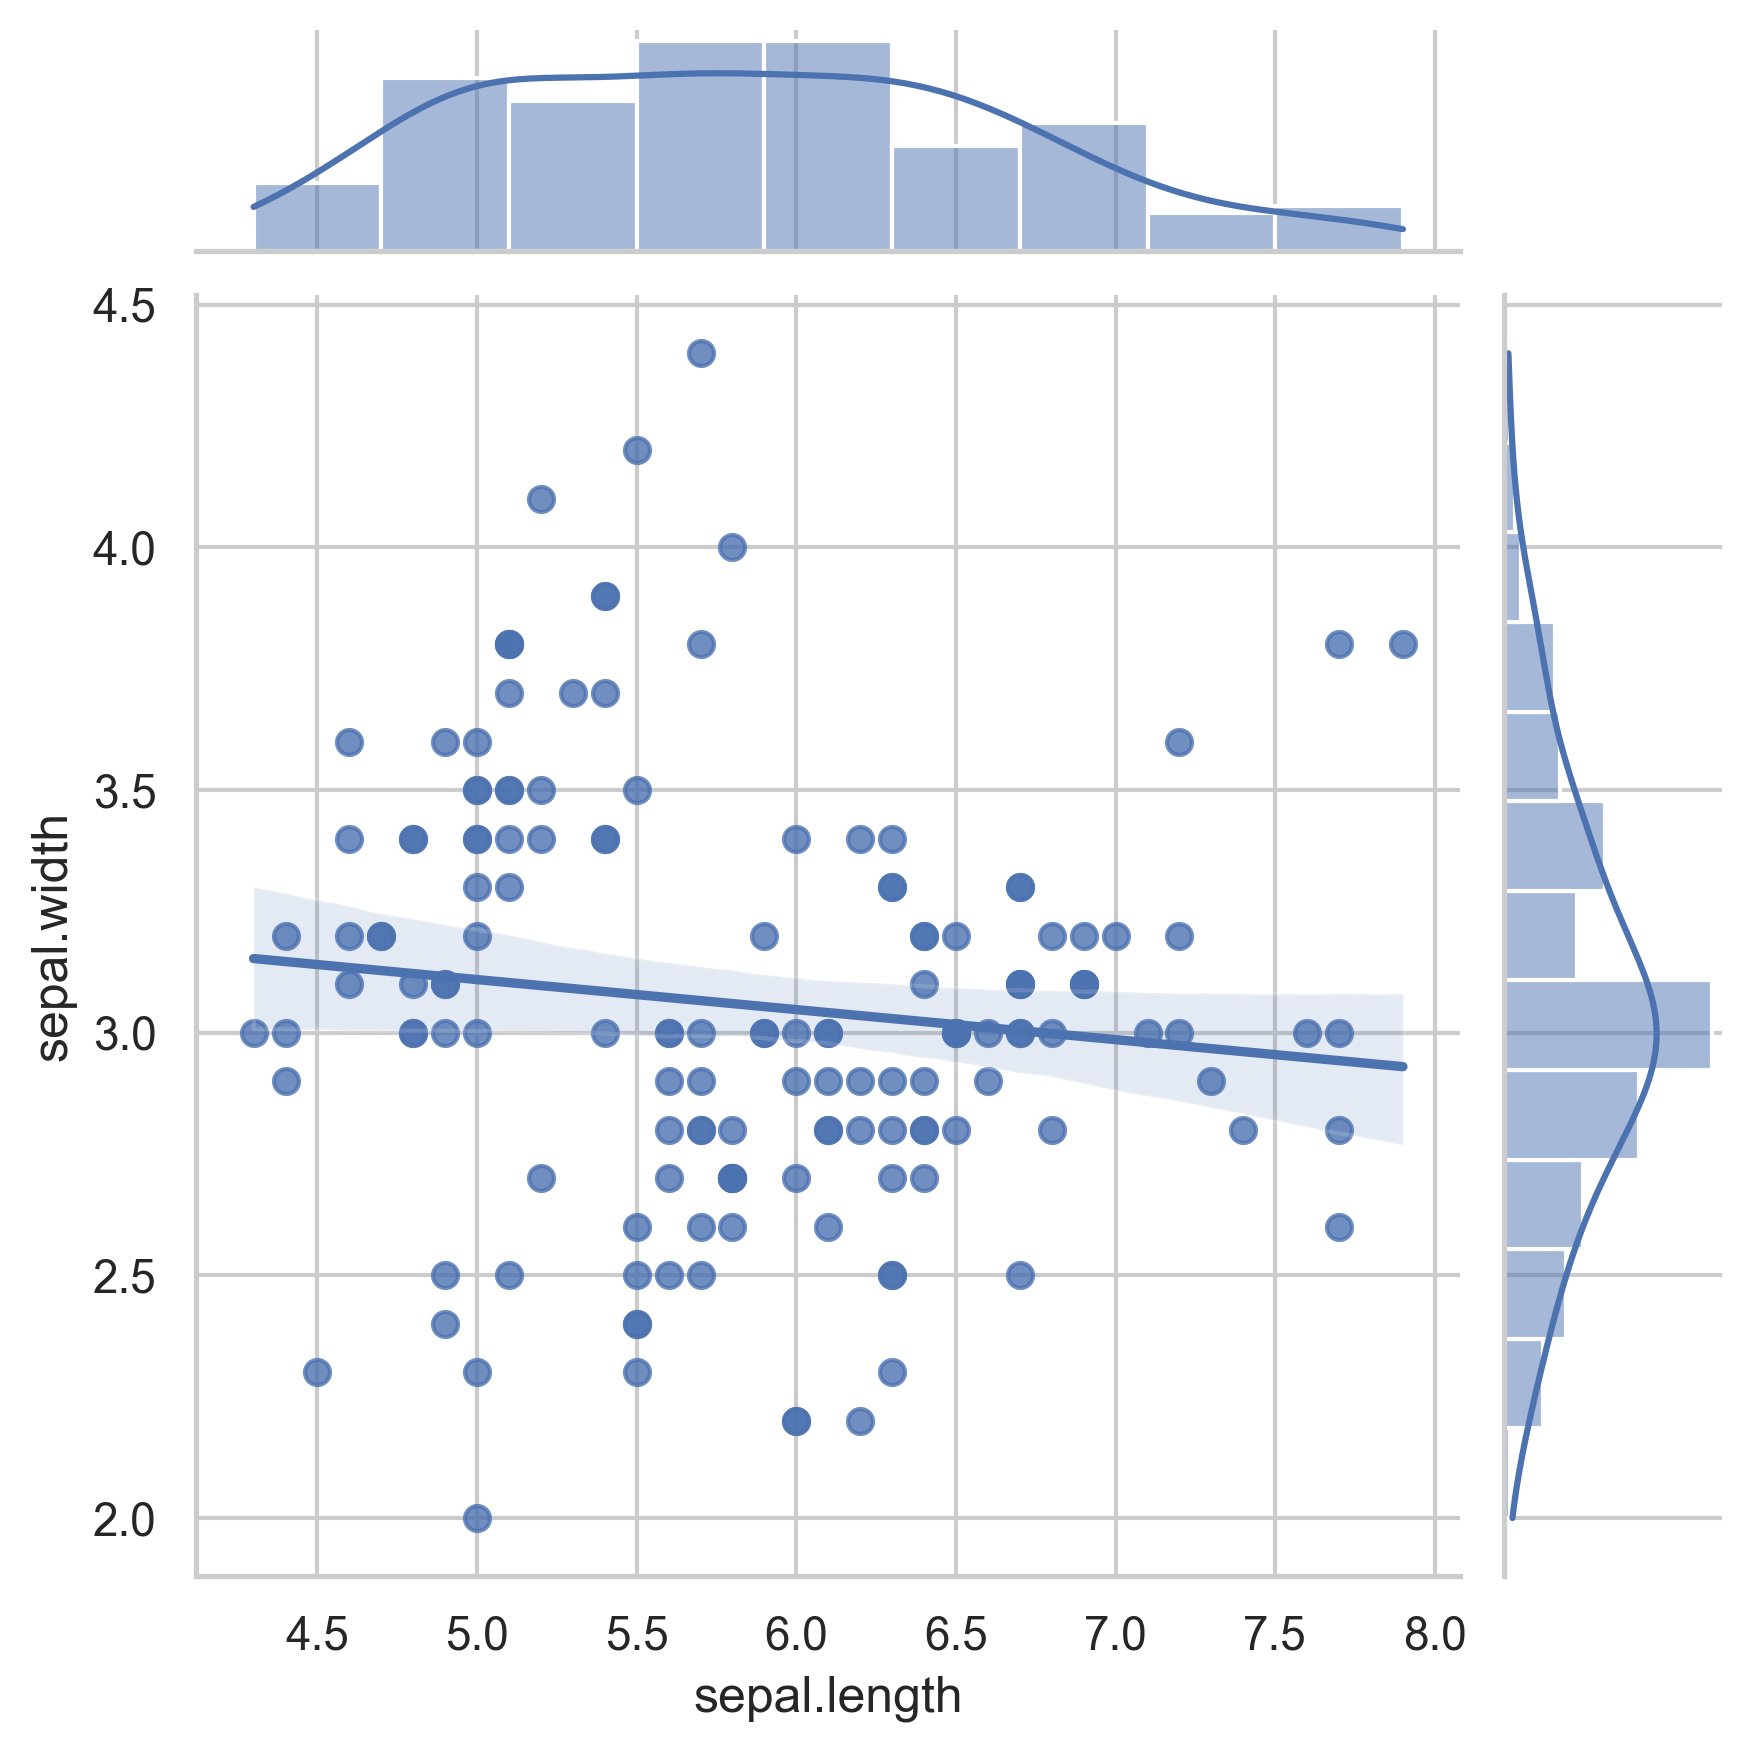

In [36]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300
# 设置图形大小
plt.figure(figsize=(2, 1.5))

# 使用seaborn的jointplot函数绘制图形
sns.jointplot(data=iris, x='sepal.length', y='sepal.width', kind='reg')

# 显示图形
plt.show()


5. 箱图——四种长度宽度数据

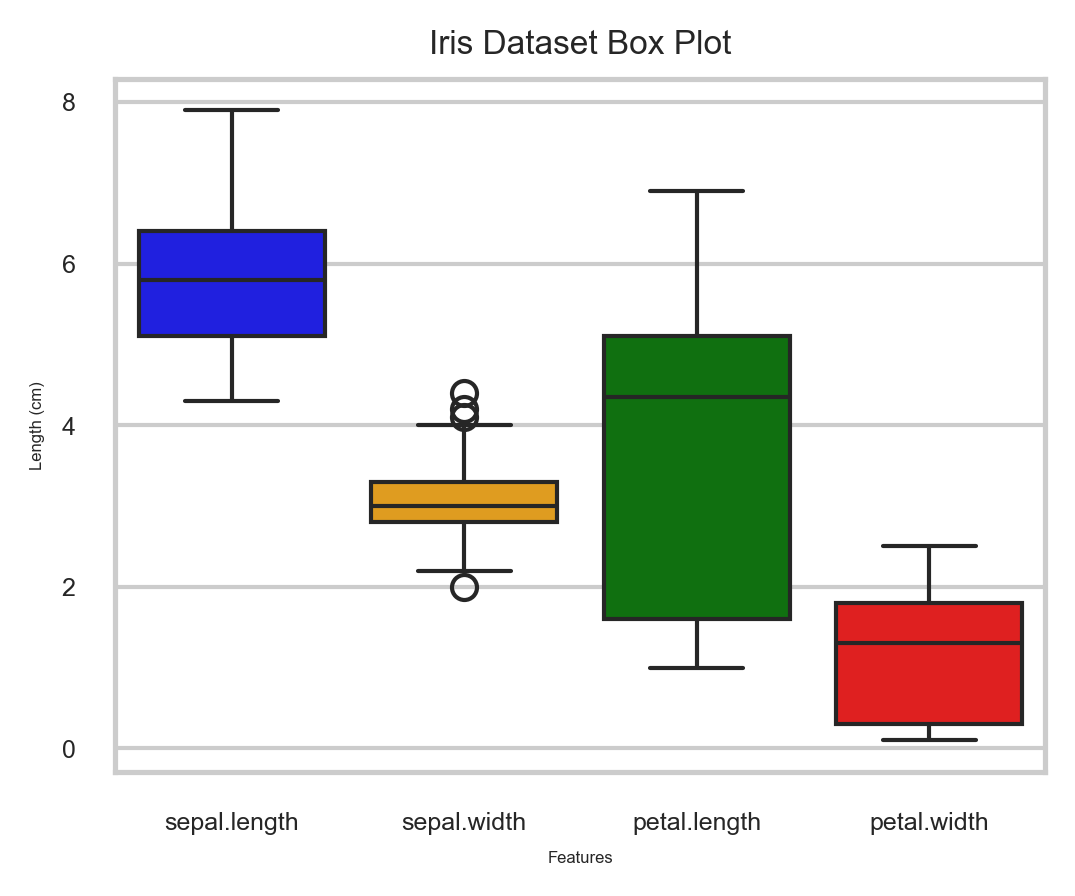

In [37]:
# 转换数据格式，便于seaborn处理
iris_melt = pd.melt(iris, id_vars=[], value_vars=['sepal.length','sepal.width', 'petal.length', 'petal.width'])

# 设置不同的颜色
colors = ['blue', 'orange', 'green', 'red']
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(4, 3))
# 绘制箱图
sns.boxplot(x='variable', y='value', data=iris_melt, hue='variable', palette=colors)

# 添加标题并设置字体大小
plt.title('Iris Dataset Box Plot', fontsize=8)
# 添加 x 轴标签并设置字体大小
plt.xlabel('Features', fontsize=4)
# 添加 y 轴标签并设置字体大小
plt.ylabel('Length (cm)', fontsize=4)
# 设置 x 轴刻度标签字体大小
plt.xticks(fontsize=6)
# 设置 y 轴刻度标签字体大小
plt.yticks([0,2,4,6,8], fontsize=6)

# 显示图形
plt.show()

6. 箱图——计数种类绘制平均值

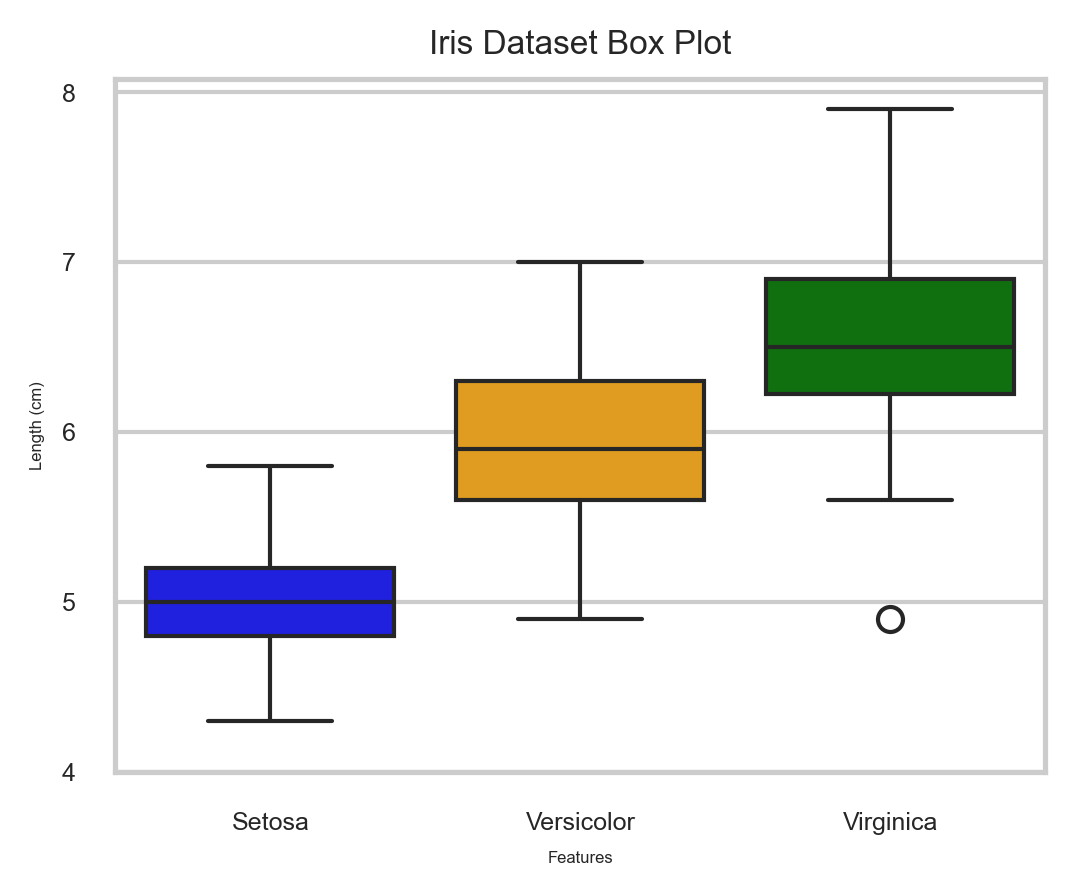

In [38]:
# 设置不同的颜色
colors = ['blue', 'orange', 'green']
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(4, 3))

# 绘制箱线图
sns.boxplot(x='variety', y='sepal.length', data=iris, hue='variety', palette=colors)

# 添加标题并设置字体大小
plt.title('Iris Dataset Box Plot', fontsize=8)
# 添加 x 轴标签并设置字体大小
plt.xlabel('Features', fontsize=4)
# 添加 y 轴标签并设置字体大小
plt.ylabel('Length (cm)', fontsize=4)
# 设置 x 轴刻度标签字体大小
plt.xticks(fontsize=6)
# 设置 y 轴刻度标签字体大小
plt.yticks([4,5,6,7,8], fontsize=6)

# 显示图形
plt.show()

7. 小提琴图

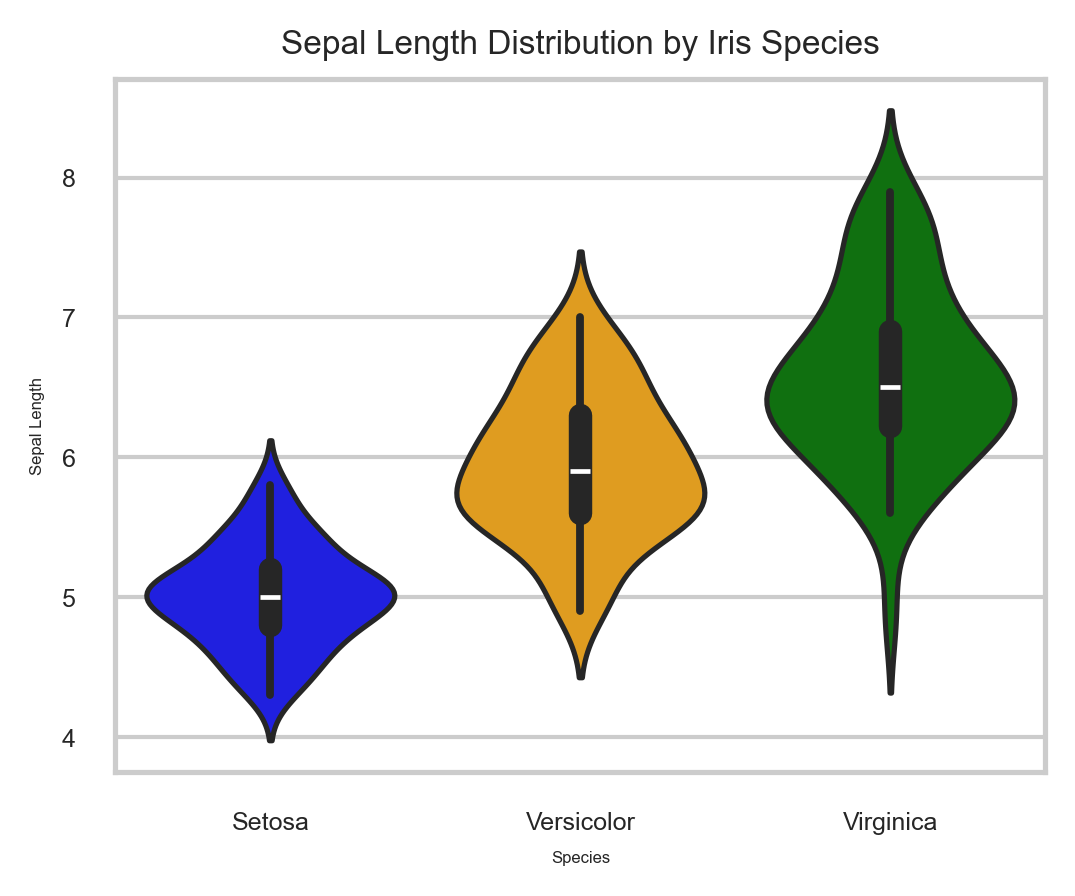

In [39]:
plt.figure(figsize=(4, 3))

# 定义调色板
colors = ['blue', 'orange', 'green']

# 绘制小提琴图
sns.violinplot(x='variety', y='sepal.length', data=iris, hue='variety', palette=colors, density_norm='width')

# 添加标题并设置字体大小
plt.title('Sepal Length Distribution by Iris Species', fontsize=8)
# 添加 x 轴标签并设置字体大小
plt.xlabel('Species', fontsize=4)
# 添加 y 轴标签并设置字体大小
plt.ylabel('Sepal Length', fontsize=4)
# 设置 x 轴刻度标签字体大小
plt.xticks(fontsize=6)
# 设置 y 轴刻度标签字体大小
plt.yticks([4,5,6,7,8], fontsize=6)

# 显示图形
plt.show()

## 第三题

读入gapminder.csv文件，并创建以下图形：

* 请画图来显示人均gpd与期望寿命之间的关系，分别使用全部数据，一个洲和一个国家（例如中国）来展示

* 请在一张图上显示各个洲平均期望寿命随时间的变化图

* 请给出不同洲期望寿命和人均GDP的分布

1. 对于第一题，我们先读取文件

In [40]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.head()

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap
0,1,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,2,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,3,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,4,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,5,Afghanistan,Asia,1972,36.088,13079460,739.981106


人均 GDP 与期望寿命之间的关系

我们可以选择是否去除一些极大值，从而使分布更加平滑，更能看出来分布情况。（这是基于预运行的情况而定的）

In [41]:
n = 6
top_max_index = gapminder['gdpPercap'].nlargest(n).index
gapminder = gapminder.drop(top_max_index)

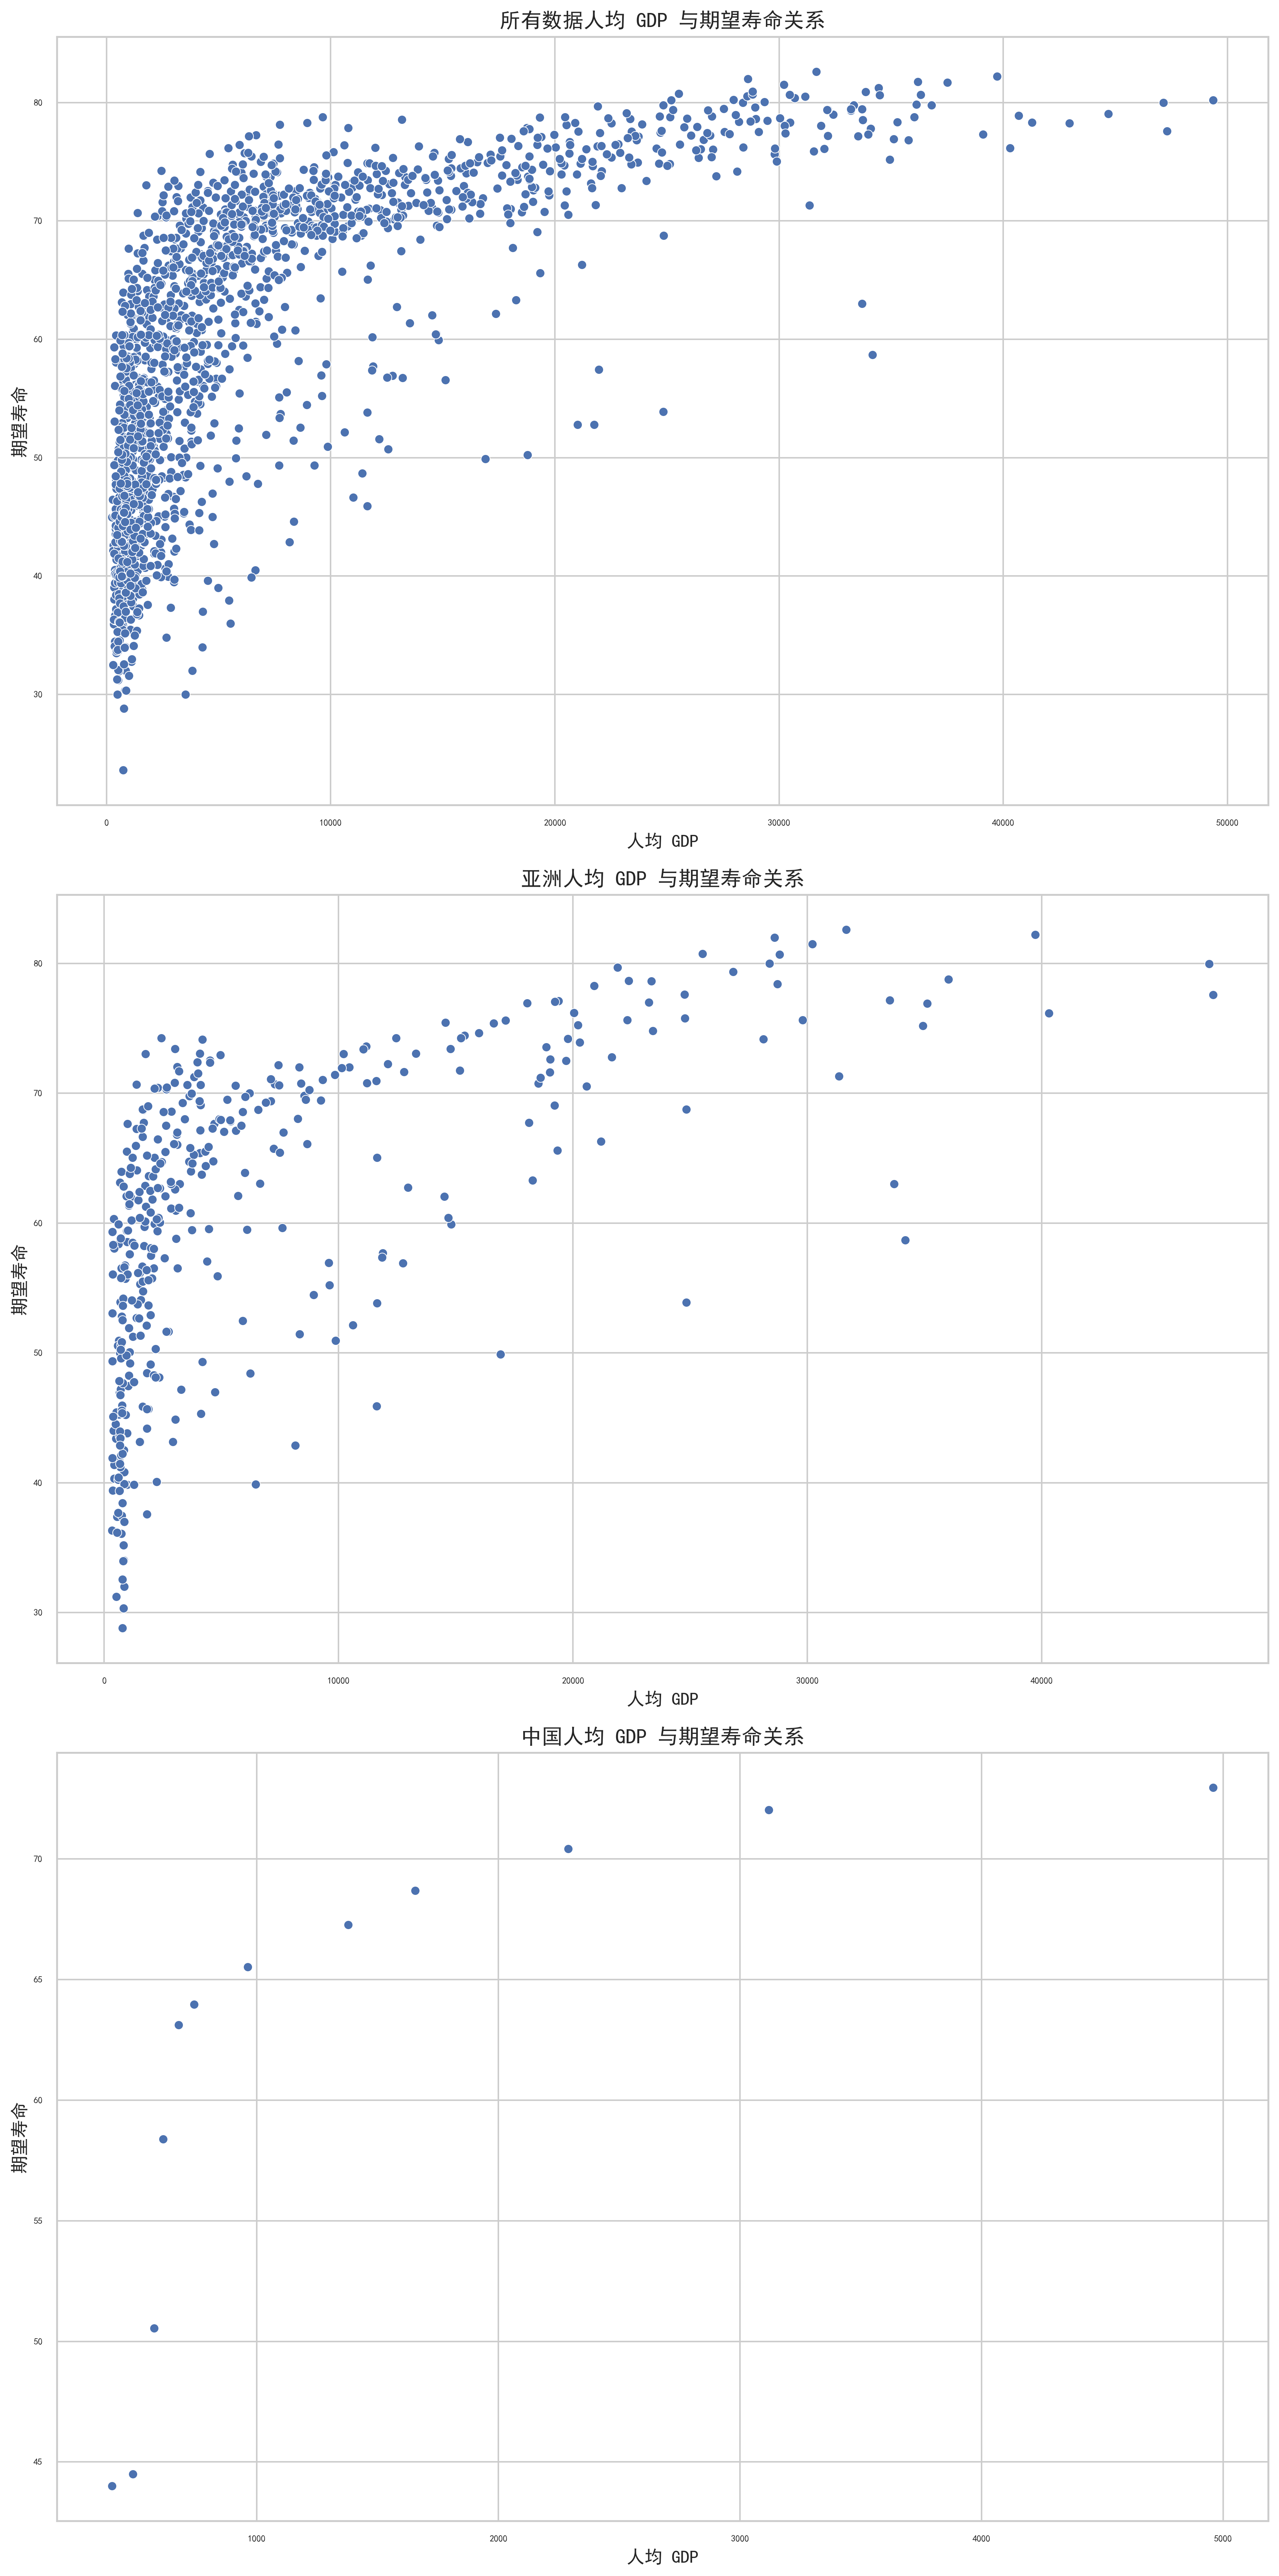

In [42]:
# 临时设置字体
plt.rc('font', family='SimHei')  # 设置字体为 SimHei
plt.rc('axes', unicode_minus=False)  # 解决负号显示问题

# 全部数据
plt.figure(figsize=(12, 24))
plt.subplot(3, 1, 1)
sns.scatterplot(data=gapminder, x='gdpPercap', y='lifeExp')
plt.title('所有数据人均 GDP 与期望寿命关系', fontsize=14)
plt.xlabel('人均 GDP', fontsize=12)
plt.ylabel('期望寿命', fontsize=12)
# 设置 x 轴刻度标签字体大小
plt.xticks(fontsize=6)
# 设置 y 轴刻度标签字体大小
plt.yticks(fontsize=6)

# 一个洲的数据（例如亚洲）
asia_data = gapminder[gapminder['continent'] == 'Asia']
plt.subplot(3, 1, 2)
sns.scatterplot(data=asia_data, x='gdpPercap', y='lifeExp')
plt.title('亚洲人均 GDP 与期望寿命关系', fontsize=14)
plt.xlabel('人均 GDP', fontsize=12)
plt.ylabel('期望寿命', fontsize=12)
# 设置 x 轴刻度标签字体大小
plt.xticks(fontsize=6)
# 设置 y 轴刻度标签字体大小
plt.yticks(fontsize=6)

# 一个国家的数据（例如中国）
china_data = gapminder[gapminder['country'] == 'China']
plt.subplot(3, 1, 3)
sns.scatterplot(data=china_data, x='gdpPercap', y='lifeExp')
plt.title('中国人均 GDP 与期望寿命关系', fontsize=14)
plt.xlabel('人均 GDP', fontsize=12)
plt.ylabel('期望寿命', fontsize=12)
# 设置 x 轴刻度标签字体大小
plt.xticks(fontsize=6)
# 设置 y 轴刻度标签字体大小
plt.yticks(fontsize=6)

plt.tight_layout()
plt.show()

由图可知，基本上GDP越高，寿命越长。但是去除的6个非常大的GDP寿命反而会有所下降。

各洲平均期望寿命随时间的变化图

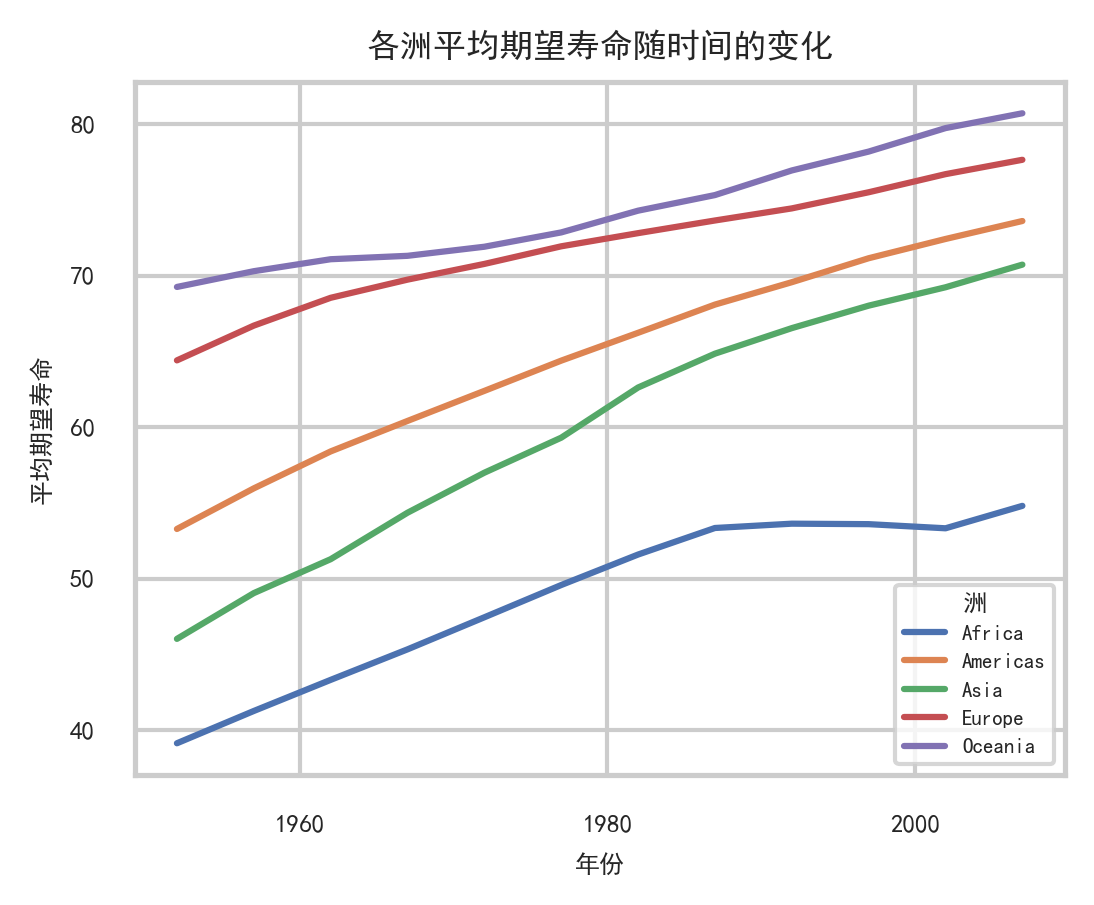

In [43]:
plt.figure(figsize=(4, 3))
grouped = gapminder.groupby(['continent', 'year'])['lifeExp'].mean().reset_index()
ax = sns.lineplot(data=grouped, x='year', y='lifeExp', hue='continent')
plt.title('各洲平均期望寿命随时间的变化', fontsize=8)
plt.xlabel('年份', fontsize=6)
plt.ylabel('平均期望寿命', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
legend = ax.legend(title='洲', fontsize=5)  # 设置图例字体大小
plt.setp(legend.get_title(), fontsize=6)  # 设置图例标题字体大小
plt.show()

显然，大洋洲和欧洲人均寿命最高，非洲最低。但是随着时代的发展，人均寿命在全世界范围内都是增加的。

不同洲期望寿命和人均 GDP 的分布

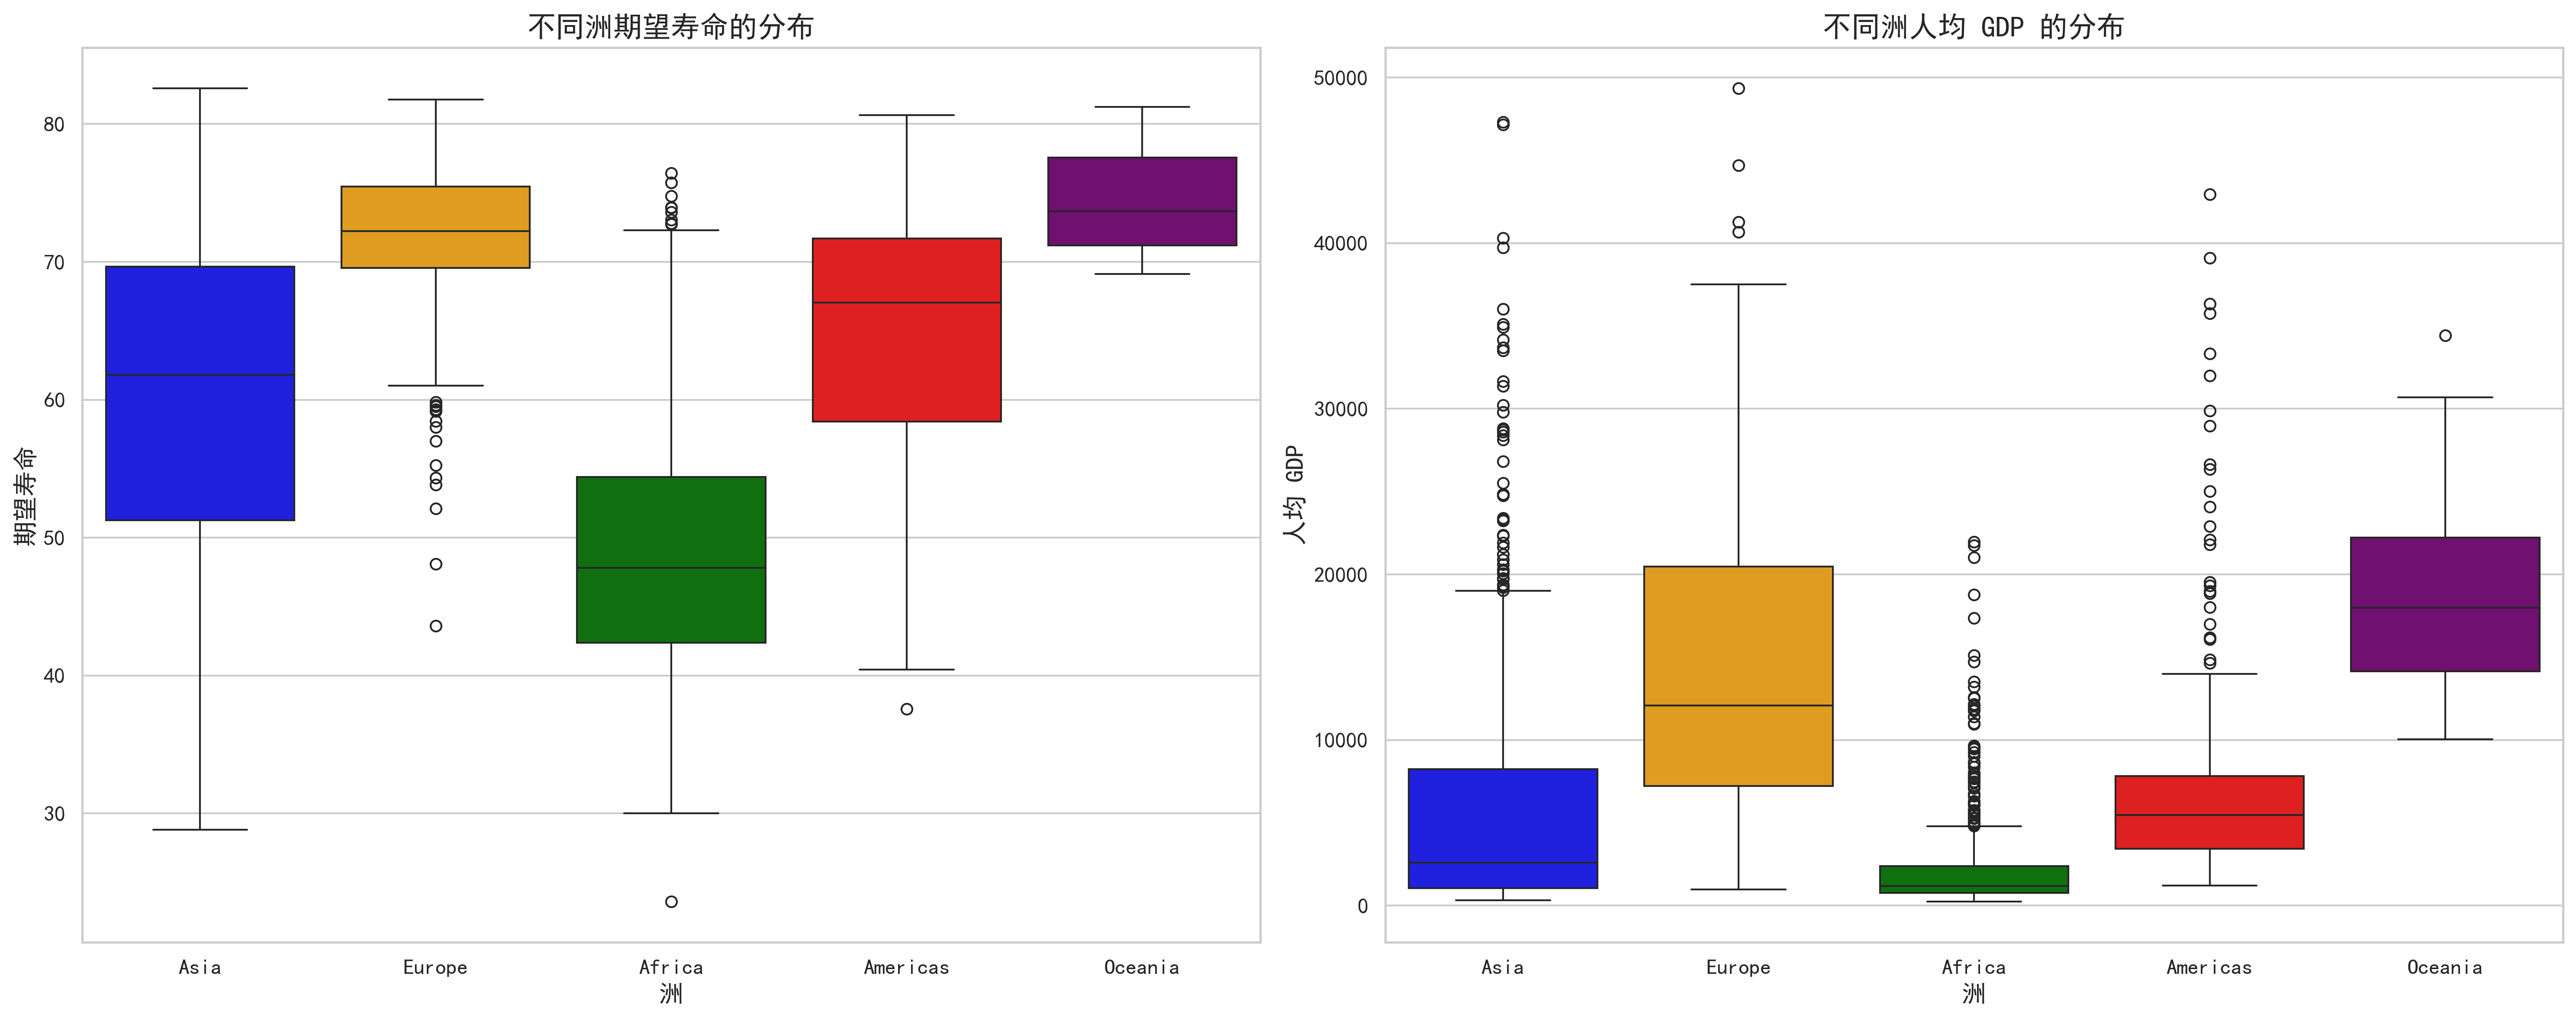

In [45]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data=gapminder, x='continent', y='lifeExp', hue='continent', palette=colors)
plt.title('不同洲期望寿命的分布', fontsize=16)
plt.xlabel('洲', fontsize=14)
plt.ylabel('期望寿命', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(data=gapminder, x='continent', y='gdpPercap', hue='continent', palette=colors)
plt.title('不同洲人均 GDP 的分布', fontsize=16)
plt.xlabel('洲', fontsize=14)
plt.ylabel('人均 GDP', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

左图可以清楚看到，欧洲和大洋洲期望寿命最高，非洲偏低；

右图可以清楚看到，亚洲存在几个极大的值，整体而言欧洲和大洋洲人均GDP高。